In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **1- Load and explore the dataset**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math

%matplotlib inline
df = pd.read_csv("/content/drive/MyDrive/heart_2020_cleaned.csv", delimiter=',') #ADD PATH TO THE DATASETS
df.isnull().sum()


HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

Drop the "unamed" columns

In [3]:
df = df.drop(df.columns[18:44], axis=1)
df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
print(df.shape)

(319795, 18)


In [5]:
print(df.dtypes)

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object


### **2- Make sure that every value is numeric**

Convert to binary numerical values

In [6]:
df.replace({'Yes':1,'No':0}, inplace=True)
df.replace({'Female':1,'Male':0}, inplace=True)

Perform one-hot encoding and normalizing

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
column_to_normalize = df['BMI']
column_reshaped = column_to_normalize.values.reshape(-1, 1)
normalized_column = scaler.fit_transform(column_reshaped)

# Replace the original column with the normalized values
df['BMI'] = normalized_column

columns_to_exclude = ['HeartDisease']  #exclude from one-hot encoding
columns_to_encode = df.columns.difference(columns_to_exclude)

df_encoded = pd.get_dummies(df[columns_to_encode])



print(df_encoded.dtypes)

AlcoholDrinking                          int64
Asthma                                   int64
BMI                                    float64
DiffWalking                              int64
KidneyDisease                            int64
MentalHealth                           float64
PhysicalActivity                         int64
PhysicalHealth                         float64
Sex                                      int64
SkinCancer                               int64
SleepTime                              float64
Smoking                                  int64
Stroke                                   int64
AgeCategory_18-24                        uint8
AgeCategory_25-29                        uint8
AgeCategory_30-34                        uint8
AgeCategory_35-39                        uint8
AgeCategory_40-44                        uint8
AgeCategory_45-49                        uint8
AgeCategory_50-54                        uint8
AgeCategory_55-59                        uint8
AgeCategory_6

In [8]:
df_encoded.head()

,AlcoholDrinking,Asthma,BMI,DiffWalking,KidneyDisease,MentalHealth,PhysicalActivity,PhysicalHealth,Sex,SkinCancer,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,1,0.055294,0,0,30.0,1,3.0,1,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0.100447,0,0,0.0,1,0.0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0.175782,0,0,30.0,1,20.0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0.147169,0,0,0.0,0,0.0,1,1,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0.141132,1,0,0.0,1,28.0,1,0,...,0,0,0,1,0,0,0,0,0,1


### **3- Apply random oversampling**

Split the dataset into features and target

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

x = df_encoded.values
y = (df['HeartDisease'] == 1.0)

#check the count for each target
print('Data total')
print(f'Disease cases: {sum(y):f}')
print(f'Healthy cases: {sum(~y):f}')

Data total
Disease cases: 27373.000000
Healthy cases: 292422.000000


In [10]:
from imblearn.over_sampling import RandomOverSampler
# Apply random oversampling to balance the classes
random_sampler = RandomOverSampler()
x, y = random_sampler.fit_resample(x, y)

print('Resampled data total')
print(f'Disease cases: {sum(y):f}')
print(f'Healthy cases: {sum(~y):f}')

Resampled data total
Disease cases: 292422.000000
Healthy cases: 292422.000000


### **4- Split the data into training and testing sets**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Check if the classes are still balanced

In [12]:
print('Training Data check')
print(f'Disease cases: {sum(y_train):f}')
print(f'Healthy cases: {sum(~y_train):f}')

print('\nTest Data check')
print(f'Disease cases: {sum(y_test):f}')
print(f'Healthy cases: {sum(~y_test):f}')

Training Data check
Disease cases: 233938.000000
Healthy cases: 233937.000000

Test Data check
Disease cases: 58484.000000
Healthy cases: 58485.000000


### **5- Standardize the features**

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
!pip install scikeras ## to download and install scikeras package

### **6- Build the neural network model**

In [15]:
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
import matplotlib.pyplot as plt

# Define the model
def create_model(hidden_units=64, my_learning_rate=0.003):
    model = keras.Sequential([
        keras.layers.Dense(hidden_units, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(hidden_units, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=my_learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [16]:
def create_model_n(neurons, my_learning_rate=0.003):
    """
    Create and compile a neural network model with a specified number of neurons.

    Parameters:
    - neurons: Number of neurons in the hidden layer.
    - my_learning_rate: Learning rate for the Adam optimizer.

    Returns:
    A compiled Keras Sequential model.
    """

    # Create a sequential model
    model = tf.keras.models.Sequential()

    # Flatten the input features
    model.add(tf.keras.layers.Flatten(input_dim=X_train.shape[1]))

    # Add a dense hidden layer with the specified number of neurons and 'relu' activation function
    model.add(tf.keras.layers.Dense(units=neurons, activation='relu'))

    # Add a dropout regularization layer
    model.add(tf.keras.layers.Dropout(rate=0.2))

    # Define the output layer with 1 unit for binary classification
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    # Compile the model with Adam optimizer, binary crossentropy loss, and accuracy metric
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                  loss="binary_crossentropy",
                  metrics=['accuracy'])

    return model

In [17]:
def create_model_a(activation, my_learning_rate=0.003):
    """
    Create and compile a neural network model with tunable hyperparameters.

    Parameters:
    - activation: Activation function for hidden layers (relu, sigmoid, linear).
    - my_learning_rate: Learning rate for the Adam optimizer.

    Returns:
    A compiled Keras sequential model.
    """

    # Create a sequential model
    model = tf.keras.models.Sequential()

    # Flatten the input features
    model.add(tf.keras.layers.Flatten(input_dim=X_train.shape[1]))

    # Define the first hidden layer with the specified activation function
    model.add(tf.keras.layers.Dense(units=32, activation=activation))

    # Add a dropout regularization layer
    model.add(tf.keras.layers.Dropout(rate=0.2))

    # Define the output layer with 1 unit for binary classification (sigmoid activation)
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    # Compile the model with Adam optimizer, binary crossentropy loss, and accuracy metric
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                  loss="binary_crossentropy",
                  metrics=['accuracy'])

    return model

In [18]:
def create_Best_model(neurons=32, activation='relu', my_learning_rate=0.003):
    """
    Create a neural network model with specified hyperparameters for binary classification.

    Parameters:
    - neurons: Number of neurons in the hidden layer.
    - activation: Activation function for the hidden layer.
    - my_learning_rate: Learning rate for the Adam optimizer.

    Returns:
    A compiled Keras Sequential model.
    """

    # Create a sequential model
    model = tf.keras.models.Sequential()

    # Flatten the input features
    model.add(tf.keras.layers.Flatten(input_dim=X_train.shape[1]))

    # Add a dense hidden layer with the specified number of neurons and activation function
    model.add(tf.keras.layers.Dense(units=neurons, activation=activation))

    # Add a dropout regularization layer
    model.add(tf.keras.layers.Dropout(rate=0.2))

    # Define the output layer with 1 unit for binary classification and sigmoid activation
    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    # Compile the model with Adam optimizer, binary crossentropy loss, and accuracy metric
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                  loss="binary_crossentropy",
                  metrics=['accuracy'])

    return model

### **7- Perform Hyperparameter Tuning - Grid Search**

 Tuning batch size and number of epochs

In [19]:
# Create the KerasClassifier
model = KerasClassifier(model=create_model, verbose=2)

# Define the grid search parameters
batch_size = [128, 512]
epochs = [10, 20]
param_grid = dict(batch_size=batch_size, epochs=epochs)

In [20]:
# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3, verbose=2)
grid_result = grid_search.fit(X_train, y_train)

# Get the best batch size and epochs
best_model = grid_result.best_estimator_

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Epoch 1/10
2437/2437 - 13s - loss: 0.4882 - accuracy: 0.7666 - 13s/epoch - 6ms/step
Epoch 2/10
2437/2437 - 7s - loss: 0.4811 - accuracy: 0.7709 - 7s/epoch - 3ms/step
Epoch 3/10
2437/2437 - 8s - loss: 0.4762 - accuracy: 0.7732 - 8s/epoch - 3ms/step
Epoch 4/10
2437/2437 - 7s - loss: 0.4703 - accuracy: 0.7766 - 7s/epoch - 3ms/step
Epoch 5/10
2437/2437 - 8s - loss: 0.4654 - accuracy: 0.7795 - 8s/epoch - 3ms/step
Epoch 6/10
2437/2437 - 7s - loss: 0.4604 - accuracy: 0.7823 - 7s/epoch - 3ms/step
Epoch 7/10
2437/2437 - 9s - loss: 0.4563 - accuracy: 0.7849 - 9s/epoch - 4ms/step
Epoch 8/10
2437/2437 - 7s - loss: 0.4522 - accuracy: 0.7871 - 7s/epoch - 3ms/step
Epoch 9/10
2437/2437 - 9s - loss: 0.4484 - accuracy: 0.7892 - 9s/epoch - 4ms/step
Epoch 10/10
2437/2437 - 7s - loss: 0.4454 - accuracy: 0.7914 - 7s/epoch - 3ms/step
1219/1219 - 2s - 2s/epoch - 2ms/step
[CV] END ..........................batch_size=128, epochs=10; total time= 1.5min

In [21]:
# Print the best parameters and grid search results
print("Best parameters: ", grid_result.best_params_)
print("Best score: ", grid_result.best_score_)
print("Grid search results:")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best parameters:  {'batch_size': 128, 'epochs': 20}
Best score:  0.7919337429347584
Grid search results:
0.785013 (0.000424) with: {'batch_size': 128, 'epochs': 10}
0.791934 (0.000856) with: {'batch_size': 128, 'epochs': 20}
0.783305 (0.000947) with: {'batch_size': 512, 'epochs': 10}
0.789320 (0.001423) with: {'batch_size': 512, 'epochs': 20}


Tuning the Number of Neurons in the hidden layers

In [22]:
# Create the KerasClassifier
model_neurons = KerasClassifier(model=create_model_n, verbose=2)

# Define the grid search parameters
param_grid_neurons = {'model__neurons': [32, 64, 128]}

In [23]:
# Perform Grid Search
grid_neurons = GridSearchCV(estimator=model_neurons, param_grid=param_grid_neurons, n_jobs=1, cv=3, verbose=2)
grid_result_neurons = grid_neurons.fit(X_train, y_train)

# Get the best number of neurons
best_neurons = grid_result_neurons.best_estimator_

Fitting 3 folds for each of 3 candidates, totalling 9 fits
9748/9748 - 29s - loss: 0.4957 - accuracy: 0.7639 - 29s/epoch - 3ms/step
4874/4874 - 7s - 7s/epoch - 1ms/step
[CV] END ..................................model__neurons=32; total time= 1.0min
9748/9748 - 28s - loss: 0.4944 - accuracy: 0.7652 - 28s/epoch - 3ms/step
4874/4874 - 8s - 8s/epoch - 2ms/step
[CV] END ..................................model__neurons=32; total time=  52.4s
9748/9748 - 28s - loss: 0.4961 - accuracy: 0.7645 - 28s/epoch - 3ms/step
4874/4874 - 7s - 7s/epoch - 1ms/step
[CV] END ..................................model__neurons=32; total time=  50.1s
9748/9748 - 28s - loss: 0.4939 - accuracy: 0.7647 - 28s/epoch - 3ms/step
4874/4874 - 7s - 7s/epoch - 1ms/step
[CV] END ..................................model__neurons=64; total time=  52.1s
9748/9748 - 28s - loss: 0.4930 - accuracy: 0.7656 - 28s/epoch - 3ms/step
4874/4874 - 7s - 7s/epoch - 1ms/step
[CV] END ..................................model__neurons=64; total

In [24]:
# Print grid search results for neurons
print("Best parameters: ", grid_result_neurons.best_params_)
print("Best score: ", grid_result_neurons.best_score_)
print("Grid search results:")
means = grid_result_neurons.cv_results_['mean_test_score']
stds = grid_result_neurons.cv_results_['std_test_score']
params = grid_result_neurons.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best parameters:  {'model__neurons': 32}
Best score:  0.7686454693840435
Grid search results:
0.768645 (0.001104) with: {'model__neurons': 32}
0.767846 (0.000801) with: {'model__neurons': 64}
0.766540 (0.003758) with: {'model__neurons': 128}


Tuning the Activtion Function in the hidden layers

In [25]:
model = KerasClassifier(model=create_model_a, my_learning_rate=0.003, verbose=2)

# define the grid search parameters

param_grid1 = {
    'model__activation': ['relu', 'sigmoid', 'linear']
}

In [26]:
# Grid search for activation function
grid_activation = GridSearchCV(estimator=model, param_grid=param_grid1,  n_jobs=-1, cv=3, verbose=2)
grid_result_activation = grid_activation.fit(X_train, y_train)

# Get the best activation function
best_activation = grid_result_activation.best_params_['model__activation']


Fitting 3 folds for each of 3 candidates, totalling 9 fits
14622/14622 - 42s - loss: 0.4939 - accuracy: 0.7650 - 42s/epoch - 3ms/step


In [27]:
# Print grid search results for activation function
print("Best parameters: ", grid_result_activation.best_params_)
print("Best score: ", grid_result_activation.best_score_)
print("Grid search results:")
means = grid_result_activation.cv_results_['mean_test_score']
stds = grid_result_activation.cv_results_['std_test_score']
params = grid_result_activation.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best parameters:  {'model__activation': 'relu'}
Best score:  0.7674442935640201
Grid search results:
0.767444 (0.001143) with: {'model__activation': 'relu'}
0.767237 (0.001383) with: {'model__activation': 'sigmoid'}
0.761949 (0.003640) with: {'model__activation': 'linear'}


### **8- Fit the best NN**

In [28]:
best_batch_size = grid_result.best_params_['batch_size']
best_epochs = grid_result.best_params_['epochs']
best_neurons = grid_result_neurons.best_params_['model__neurons']
best_activation = grid_result_activation.best_params_['model__activation']

best_model = create_Best_model(
    neurons=best_neurons,
    activation=best_activation,
    my_learning_rate=0.003
)

# Compile the model with a learning rate
best_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

best_model.fit(X_train, y_train, batch_size=best_batch_size, epochs=best_epochs)

Epoch 1/20
3656/3656 [==============================] - 15s 4ms/step - loss: 0.5581 - accuracy: 0.7157
Epoch 2/20
3656/3656 [==============================] - 14s 4ms/step - loss: 0.5045 - accuracy: 0.7583
Epoch 3/20
3656/3656 [==============================] - 14s 4ms/step - loss: 0.4974 - accuracy: 0.7619
Epoch 4/20
3656/3656 [==============================] - 14s 4ms/step - loss: 0.4941 - accuracy: 0.7648
Epoch 5/20
3656/3656 [==============================] - 14s 4ms/step - loss: 0.4923 - accuracy: 0.7661
Epoch 6/20
3656/3656 [==============================] - 13s 4ms/step - loss: 0.4910 - accuracy: 0.7664
Epoch 7/20
3656/3656 [==============================] - 14s 4ms/step - loss: 0.4898 - accuracy: 0.7672
Epoch 8/20
3656/3656 [==============================] - 14s 4ms/step - loss: 0.4892 - accuracy: 0.7676
Epoch 9/20
3656/3656 [==============================] - 14s 4ms/step - loss: 0.4890 - accuracy: 0.7674
Epoch 10/20
3656/3656 [==============================] - 14s 4ms/step - l

### **9- Evaluate the model performance on test set**


Final model training results:
Best number of neurons: 32
Best activation function: relu
Best batch size: 128
Best epochs: 20
3656/3656 [==============================] - 8s 2ms/step
              precision    recall  f1-score   support

       False       0.80      0.73      0.76     58485
        True       0.75      0.81      0.78     58484

    accuracy                           0.77    116969
   macro avg       0.77      0.77      0.77    116969
weighted avg       0.77      0.77      0.77    116969

Evaluation Metrics:
Accuracy: 0.7701
Precision: 0.7483
Recall: 0.8139
F1-score: 0.7797


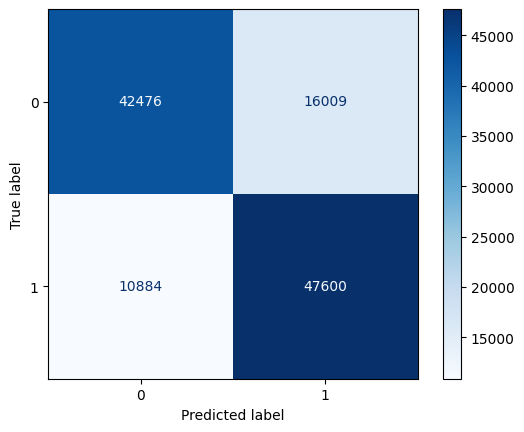

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Display the final model training results
print("\nFinal model training results:")
print("Best number of neurons:", best_neurons)
print("Best activation function:", best_activation)
print("Best batch size:", best_batch_size)
print("Best epochs:", best_epochs)

# Evaluate the model
y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap='Blues')

# Print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Show the confusion matrix plot
plt.show()

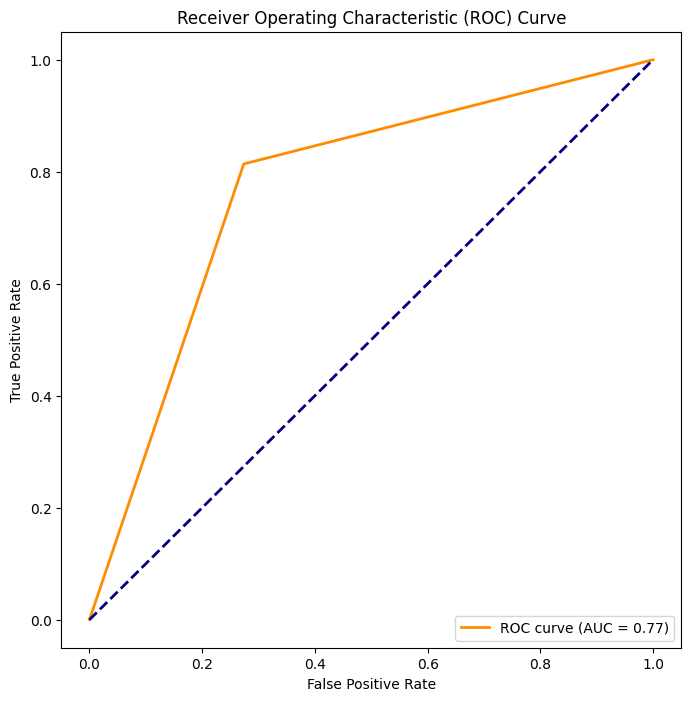

In [33]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [39]:
# Train the best_model with the best hyperparameters
history =best_model.fit(X_train, y_train, batch_size=best_batch_size, epochs=best_epochs,validation_split=0.2)



Epoch 1/20
2925/2925 [==============================] - 16s 5ms/step - loss: 0.4851 - accuracy: 0.7703 - val_loss: 0.4817 - val_accuracy: 0.7707
Epoch 2/20
2925/2925 [==============================] - 12s 4ms/step - loss: 0.4853 - accuracy: 0.7705 - val_loss: 0.4817 - val_accuracy: 0.7707
Epoch 3/20
2925/2925 [==============================] - 12s 4ms/step - loss: 0.4852 - accuracy: 0.7709 - val_loss: 0.4818 - val_accuracy: 0.7707
Epoch 4/20
2925/2925 [==============================] - 14s 5ms/step - loss: 0.4853 - accuracy: 0.7706 - val_loss: 0.4818 - val_accuracy: 0.7709
Epoch 5/20
2925/2925 [==============================] - 13s 4ms/step - loss: 0.4851 - accuracy: 0.7706 - val_loss: 0.4818 - val_accuracy: 0.7707
Epoch 6/20
2925/2925 [==============================] - 13s 5ms/step - loss: 0.4851 - accuracy: 0.7709 - val_loss: 0.4818 - val_accuracy: 0.7710
Epoch 7/20
2925/2925 [==============================] - 13s 4ms/step - loss: 0.4850 - accuracy: 0.7705 - val_loss: 0.4818 - val_ac

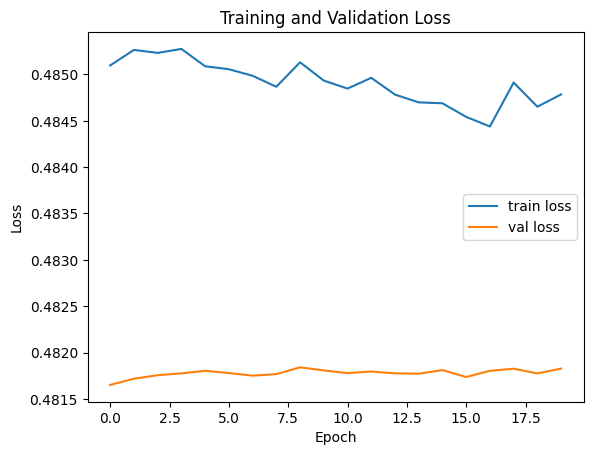

In [41]:
# Plotting Loss Curves
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()



### **10- Save the model**

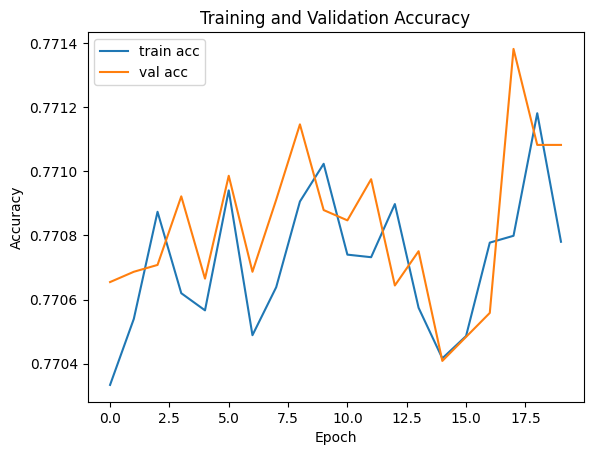

In [42]:
# Plotting Accuracy Curves
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
best_model.save('NN_PersonalKeyIndicatorsofHeartDisease_Dataset.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
